<a href="https://colab.research.google.com/github/Harshubh-Meherishi/FashionMNIST-Nueral-Network-PyTorch-/blob/master/Dropout_in_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importing Libraries and getting Data

!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
import torch 
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim
#transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,),(0.5,))
                               ])

#Download and load the data
trainset = datasets.FashionMNIST('FMnist-data/',download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64, shuffle = True)

testset = datasets.FashionMNIST('FMnist-data/',download = True, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(trainset,batch_size = 64, shuffle = True)

--2020-08-31 05:54:48--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [2]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,32)
    self.fc5 = nn.Linear(32,10)

    #dropout
    self.dropout = nn.Dropout(p=0.2)
  
  def forward(self,x):
    x= x.view(x.shape[0],-1)
    x= self.dropout(F.relu(self.fc1(x)))
    x= self.dropout(F.relu(self.fc2(x)))
    x= self.dropout(F.relu(self.fc3(x)))
    x= self.dropout(F.relu(self.fc4(x)))
    x= F.log_softmax(self.fc5(x), dim =1)
    return x
    


In [4]:
criterion = nn.NLLLoss()
test_losses, train_losses = [],[]
model = Classifier()
optimizer = optim.Adam(model.parameters(),lr=0.003)
epochs = 30
steps = 0
for e in range(epochs):
  running_loss = 0
  for images,labels in trainloader:
    optimizer.zero_grad()
    logps = model.forward(images)
    loss = criterion(logps,labels)
    loss.backward()
    optimizer.step()
    running_loss+= loss.item()

  else:
    test_loss= 0
    accuracy = 0
    with torch.no_grad():
       model.eval()
       for images,labels in testloader:
         logps = model.forward(images)
         test_loss += criterion(logps,labels)
         ps = torch.exp(logps)
         top_p,top_class = ps.topk(1,dim=1)
         equals = top_class == labels.view(*top_class.shape)
         accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    model.train()
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

    print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
                

         


Epoch: 1/30..  Training Loss: 0.690..  Test Loss: 0.484..  Test Accuracy: 0.826
Epoch: 2/30..  Training Loss: 0.522..  Test Loss: 0.398..  Test Accuracy: 0.858
Epoch: 3/30..  Training Loss: 0.490..  Test Loss: 0.408..  Test Accuracy: 0.854
Epoch: 4/30..  Training Loss: 0.466..  Test Loss: 0.399..  Test Accuracy: 0.857
Epoch: 5/30..  Training Loss: 0.448..  Test Loss: 0.355..  Test Accuracy: 0.873
Epoch: 6/30..  Training Loss: 0.437..  Test Loss: 0.373..  Test Accuracy: 0.865
Epoch: 7/30..  Training Loss: 0.434..  Test Loss: 0.360..  Test Accuracy: 0.869
Epoch: 8/30..  Training Loss: 0.418..  Test Loss: 0.324..  Test Accuracy: 0.881
Epoch: 9/30..  Training Loss: 0.416..  Test Loss: 0.320..  Test Accuracy: 0.882
Epoch: 10/30..  Training Loss: 0.418..  Test Loss: 0.326..  Test Accuracy: 0.882
Epoch: 11/30..  Training Loss: 0.419..  Test Loss: 0.337..  Test Accuracy: 0.876
Epoch: 12/30..  Training Loss: 0.417..  Test Loss: 0.343..  Test Accuracy: 0.877
Epoch: 13/30..  Training Loss: 0.400.

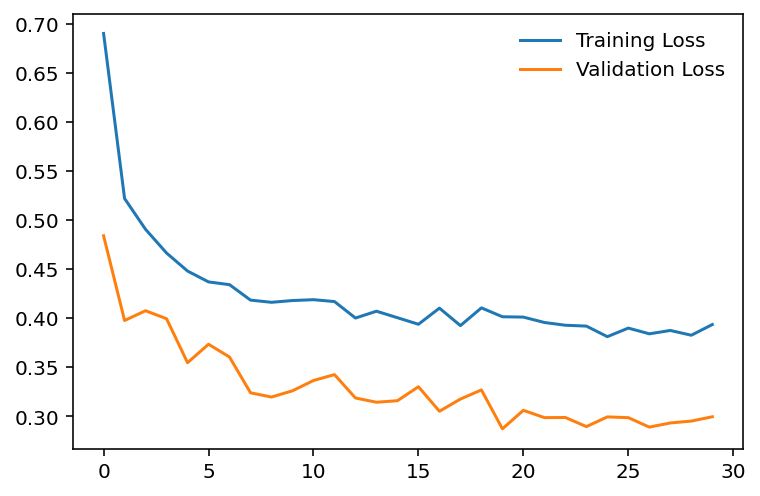

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.pyplot as plt
 
plt.plot(train_losses, label = 'Training Loss')
plt.plot(test_losses, label = 'Validation Loss')
plt.legend(frameon = False)